# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559700 sha256=08d39872bbfc2a1f6656470b4a1198565a7fa63fd7327bd291d4972f2d1e91b8
  Stored in directory: c:\users\aperr\appdata\local\pip\cache\wheels\6d\df\5e\ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

#list of city data
city_data = []

# create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # group the cities in sets of 50 for logging purposes
    if(i % 50 == 0 and i >= 50):
        # reset the group every 50 counts of cities
        set_count += 1
        record_count = 1
        
    # create the endpoint url for each city
    city_url = f"{url}&q={city}"
    
    # Log the record and the set number
    print(f"Processing city #{record_count} in group #{set_count} | {city}")
    record_count += 1
    
    try:
        # run API requests and retrieve the data
        city_weather = requests.get(city_url).json()
        
        # add a time delay to avoid blowing out the API key
        time.sleep(2)
        
        #Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})    
        
            
    except:
        # if an error occurs when making the API call, skip the city
        print(f"{city} has an error. Skipping...")
        pass
    
# Indicate the Data Loading is complete
print("----------------------------------")
print("Data Retrieval Complete           ")
print("----------------------------------")

Beginning Data Retrieval     
-----------------------------
Processing city #1 in group #1 | kangaatsiaq
Processing city #2 in group #1 | rikitea
Processing city #3 in group #1 | mahebourg
Processing city #4 in group #1 | sentyabrskiy
sentyabrskiy has an error. Skipping...
Processing city #5 in group #1 | barrow
Processing city #6 in group #1 | perth
Processing city #7 in group #1 | saint-philippe
Processing city #8 in group #1 | beringovskiy
Processing city #9 in group #1 | vaini
Processing city #10 in group #1 | tateyama
Processing city #11 in group #1 | sterling
Processing city #12 in group #1 | fairbanks
Processing city #13 in group #1 | pauini
Processing city #14 in group #1 | saskylakh
Processing city #15 in group #1 | comodoro rivadavia
Processing city #16 in group #1 | junction city
Processing city #17 in group #1 | khatanga
Processing city #18 in group #1 | kismayo
Processing city #19 in group #1 | coihaique
Processing city #20 in group #1 | altamira
Processing city #21 in gro

Processing city #26 in group #4 | santo tomas
Processing city #27 in group #4 | kropotkin
Processing city #28 in group #4 | kristallopiyi
kristallopiyi has an error. Skipping...
Processing city #29 in group #4 | burgeo
Processing city #30 in group #4 | nemuro
Processing city #31 in group #4 | kodinar
Processing city #32 in group #4 | pangnirtung
Processing city #33 in group #4 | torres
Processing city #34 in group #4 | aklavik
Processing city #35 in group #4 | kapuskasing
Processing city #36 in group #4 | bintulu
Processing city #37 in group #4 | hithadhoo
Processing city #38 in group #4 | sobolevo
Processing city #39 in group #4 | treinta y tres
Processing city #40 in group #4 | lebu
Processing city #41 in group #4 | takoradi
Processing city #42 in group #4 | chuy
Processing city #43 in group #4 | kamenka
Processing city #44 in group #4 | codrington
Processing city #45 in group #4 | adrar
Processing city #46 in group #4 | vao
Processing city #47 in group #4 | katherine
Processing city

barbar has an error. Skipping...
Processing city #7 in group #8 | baihar
Processing city #8 in group #8 | orsk
Processing city #9 in group #8 | pankrushikha
Processing city #10 in group #8 | taiyuan
Processing city #11 in group #8 | formoso do araguaia
formoso do araguaia has an error. Skipping...
Processing city #12 in group #8 | mukhen
Processing city #13 in group #8 | roebourne
Processing city #14 in group #8 | nador
Processing city #15 in group #8 | maracaju
Processing city #16 in group #8 | gigmoto
Processing city #17 in group #8 | kaka
Processing city #18 in group #8 | talnakh
Processing city #19 in group #8 | skjervoy
Processing city #20 in group #8 | bathsheba
Processing city #21 in group #8 | carballo
Processing city #22 in group #8 | lang son
Processing city #23 in group #8 | saurimo
Processing city #24 in group #8 | ternate
Processing city #25 in group #8 | bubaque
Processing city #26 in group #8 | berberati
Processing city #27 in group #8 | shingu
Processing city #28 in gro

Processing city #37 in group #11 | damaturu
Processing city #38 in group #11 | saint-joseph
Processing city #39 in group #11 | cubuk
Processing city #40 in group #11 | bara
Processing city #41 in group #11 | ust-nera
Processing city #42 in group #11 | makat
Processing city #43 in group #11 | timaru
Processing city #44 in group #11 | gisborne
Processing city #45 in group #11 | pathardi
Processing city #46 in group #11 | carahue
Processing city #47 in group #11 | tawkar
tawkar has an error. Skipping...
Processing city #48 in group #11 | cockburn town
Processing city #49 in group #11 | akyab
Processing city #50 in group #11 | dakar
Processing city #1 in group #12 | nacala
Processing city #2 in group #12 | bereda
Processing city #3 in group #12 | pandaria
Processing city #4 in group #12 | luwingu
Processing city #5 in group #12 | bosaso
Processing city #6 in group #12 | porto velho
Processing city #7 in group #12 | iracoubo
Processing city #8 in group #12 | lavrentiya
Processing city #9 in

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kangaatsiaq,68.3065,-53.4641,-14.53,98,100,11.61,GL,1644476513
1,rikitea,-23.1203,-134.9692,79.14,74,19,19.37,PF,1644476494
2,mahebourg,-20.4081,57.7000,80.58,69,10,7.29,MU,1644476518
3,barrow,71.2906,-156.7887,-16.58,63,100,6.91,US,1644476453
4,perth,-31.9333,115.8333,102.38,23,0,13.80,AU,1644476289


In [7]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,19.776900,21.383171,51.423275,71.353765,56.735552,7.840841,1.644477e+09
std,33.382097,90.916500,30.790642,22.360544,42.067595,5.607451,4.166442e+02
min,-54.800000,-179.166700,-41.930000,9.000000,0.000000,0.000000,1.644476e+09
25%,-7.658450,-58.117500,33.380000,59.000000,8.000000,3.715000,1.644477e+09
50%,23.866700,27.728500,62.980000,76.000000,74.000000,6.460000,1.644477e+09
75%,46.649950,99.683850,75.235000,89.000000,100.000000,10.495000,1.644478e+09
max,78.218600,179.316700,102.380000,100.000000,100.000000,37.040000,1.644478e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index

print(dirty_city_data)


Int64Index([], dtype='int64')


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kangaatsiaq,68.3065,-53.4641,-14.53,98,100,11.61,GL,1644476513
1,rikitea,-23.1203,-134.9692,79.14,74,19,19.37,PF,1644476494
2,mahebourg,-20.4081,57.7000,80.58,69,10,7.29,MU,1644476518
3,barrow,71.2906,-156.7887,-16.58,63,100,6.91,US,1644476453
4,perth,-31.9333,115.8333,102.38,23,0,13.80,AU,1644476289


In [10]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

#Export the City_Data in a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(close=None, block=None)>

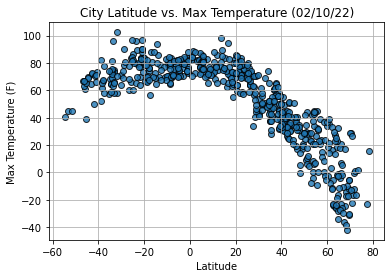

In [13]:
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure
plt.savefig("output_data/Fig1.png")

plt.show

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

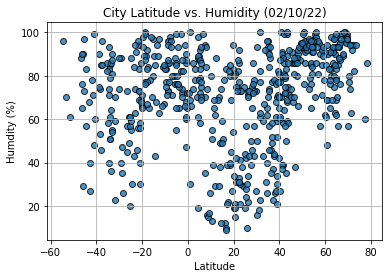

In [14]:
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humdity (%)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure
plt.savefig("output_data/Fig2.png")

plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

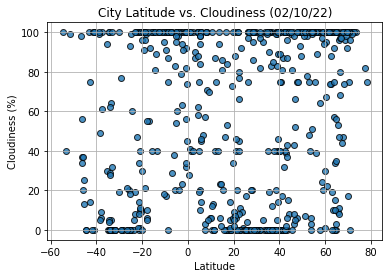

In [15]:
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure
plt.savefig("output_data/Fig3.png")

plt.show



## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

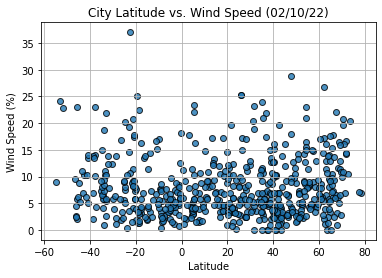

In [16]:
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure
plt.savefig("output_data/Fig4.png")

plt.show

## Linear Regression

In [35]:
#Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    #run a regression on the hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f" the r-value is: {rvalue**2}")
    plt.show()

In [36]:
#Create Northern and Southern Hemisphere Dataframes
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 the r-value is: 0.8071017412253321


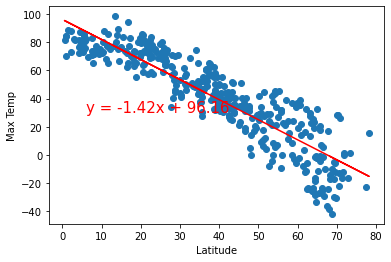

In [37]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))
# With a r-value greater than 0.7, there is a strong correlation between Latitude and Max Temp

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 the r-value is: 0.19874266209886984


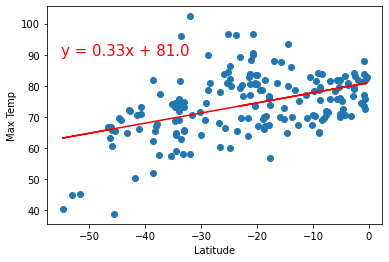

In [39]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(-55,90))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 the r-value is: 0.1907661457720292


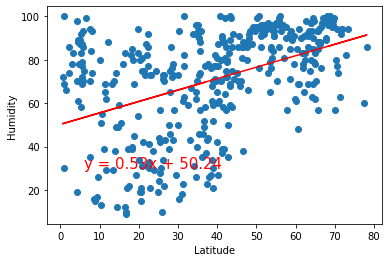

In [41]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(6,30))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 the r-value is: 0.05114621828618688


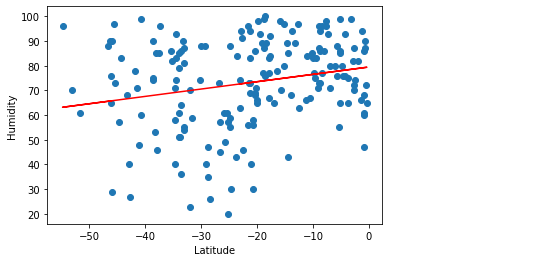

In [42]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(6,30))
# With the r value being well below 0.3, its safe to conclude that Latitude and Humidity has a no or a very week correclation in the Southern Hemisphere


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 the r-value is: 0.058280230743909464


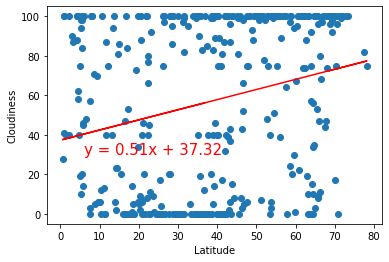

In [43]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(6,30))
# There is no or a very weak correlation between Latitude and Cloudiness since r-value is far below 0.3

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 the r-value is: 0.1298806975990222


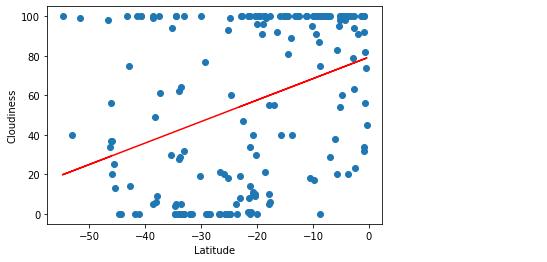

In [44]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(6,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 the r-value is: 0.01873523687200049


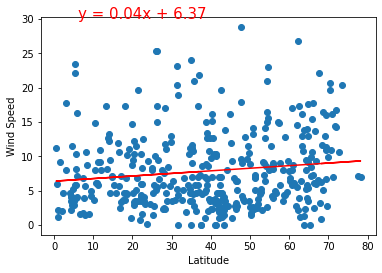

In [45]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(6,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 the r-value is: 0.06536899589700472


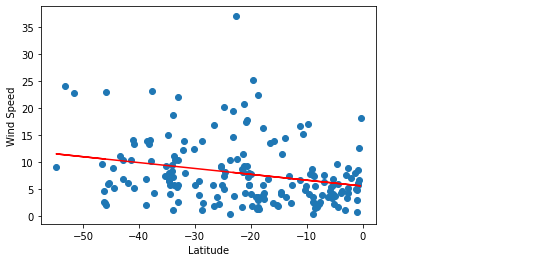

In [46]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(6,30))